Investigation into single engine aircraft

This data was obtained through the NTSB aviation accident database

The NTSB aviation accident database contains civil aviation accidents and selected incidents that occurred from 1962 to present within the United States, its territories and possessions, and in international waters. Foreign investigations in which the NTSB participated as an accredited representative will also be listed.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import process


c:\Users\Xx\anaconda3\envs\tf\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
data = pd.read_csv('NTSB_Single_Engine_Crashes.csv', low_memory=False)
data = data.sort_values('EventDate', ascending=True)

numTotalRows = len(data)

# data.head()

In [3]:
## Cleaning the "Make Column"

data['Make'] = data['Make'].str.lower()
# Remove duplicate entries and standardize separators
data['Make'] = data['Make'].str.split(',').str[0]

abbreviation_mapping = {
    'b737': 'boeing',
    'a320': 'airbus',
    'c172': 'cessna',
    'gruman' : 'grumman',
    'grumm amer' : 'grumman',
    'grum amer': 'grumman',
    'beech' : 'beechcraft'
    # Add more abbreviations and their corresponding full names
}
data['Make'] = data['Make'].replace(abbreviation_mapping)

data['Make'] = data['Make'].astype(str)
data['Make'].fillna('Unknown', inplace=True)

## Cleaining 

data['AirCraftCategory'].fillna('Unknown', inplace=True)

## Dropping unnecessary columns

data.drop('NtsbNo', axis=1, inplace=True)
data.drop('Mkey', axis=1, inplace=True)
data.drop('ReportNo', axis=1, inplace=True)
data.drop('N', axis=1, inplace=True)
data.drop('HasSafetyRec', axis=1, inplace=True)
data.drop('ReportType', axis=1, inplace=True)
data.drop('OriginalPublishDate', axis=1, inplace=True)
data.drop('EventID', axis=1, inplace=True)
data.drop('DocketUrl', axis=1, inplace=True)
data.drop('DocketPublishDate', axis=1, inplace=True)
data.drop('Scheduled', axis=1, inplace=True)
data.drop('ReportStatus', axis=1, inplace=True)
data.drop('RepGenFlag', axis=1, inplace=True)
data.drop('City', axis=1, inplace=True)
data.drop('State', axis=1, inplace=True)
data.drop('AirportName', axis=1, inplace=True)
data.drop('AirportID', axis=1, inplace=True)
data.drop('FAR', axis=1, inplace=True)
heli_rows = data[data['AirCraftCategory'].str.contains('HELI', case=False)]
data.drop(heli_rows.index)
heli_rows = data[data['AirCraftCategory'].str.contains('HELI, HELI', case=False)]
data.drop(heli_rows.index)


# data.head()

,EventType,EventDate,Country,HighestInjuryLevel,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,ProbableCause,Latitude,Longitude,Make,Model,AirCraftCategory,AmateurBuilt,NumberOfEngines,PurposeOfFlight,AirCraftDamage,WeatherCondition,Operator,Unnamed: 37
142872,ACC,1948-10-24T16:55:00Z,United States,Fatal,2,0,0,THE PILOTS ATTEMPTED VFR FLIGHT IN IMC CONDITI...,45.799663,-115.510200,stinson,108-3,AIR,FALSE,1,PERS,Destroyed,Unknown,NaN,NaN
142871,ACC,1962-02-15T05:00:00Z,United States,NaN,0,0,0,NaN,0.000000,0.000000,cessna,180A,AIR,FALSE,1,NaN,Substantial,VFR,NaN,NaN
142870,ACC,1962-04-07T04:00:00Z,United States,NaN,0,0,0,NaN,0.000000,0.000000,cessna,180A,AIR,FALSE,1,NaN,Substantial,VFR,WIEN ALASKA AIRLINES INC,NaN
142869,ACC,1962-07-19T23:45:00Z,United States,Fatal,4,0,0,IN-FLIGHT COLLISION WITH TERRAIN FOR UNKNOWN R...,38.269706,-119.329566,piper,PA24-180,AIR,FALSE,1,PERS,Destroyed,Unknown,CAPITAL SKYPARK INC.,NaN
142868,ACC,1963-04-02T05:00:00Z,United States,NaN,0,0,0,NaN,0.000000,0.000000,dehavilland,DHC-2,AIR,FALSE,1,NaN,Substantial,VFR,WIEN ALASKA AIRLINES INC,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,ACC,2023-08-11T09:00:00Z,United States,NaN,0,0,0,NaN,37.565389,-97.174611,cessna,172,AIR,FALSE,1,PERS,Substantial,NaN,NaN,NaN
3,ACC,2023-08-11T10:30:00Z,United States,NaN,0,0,0,NaN,39.097700,-121.569800,cessna,172M,AIR,FALSE,1,INST,Substantial,NaN,FOX TWO LLC,NaN
2,ACC,2023-08-12T08:48:00Z,United States,Fatal,1,0,0,NaN,39.497870,-89.782440,vans,RV14,AIR,TRUE,1,PERS,Substantial,VMC,NaN,NaN
1,ACC,2023-08-12T08:50:00Z,United States,Fatal,1,0,0,NaN,41.004602,-76.288061,bell,47G-5,HELI,FALSE,1,AAPL,Destroyed,VMC,TRIPLE F FLYING INC,NaN


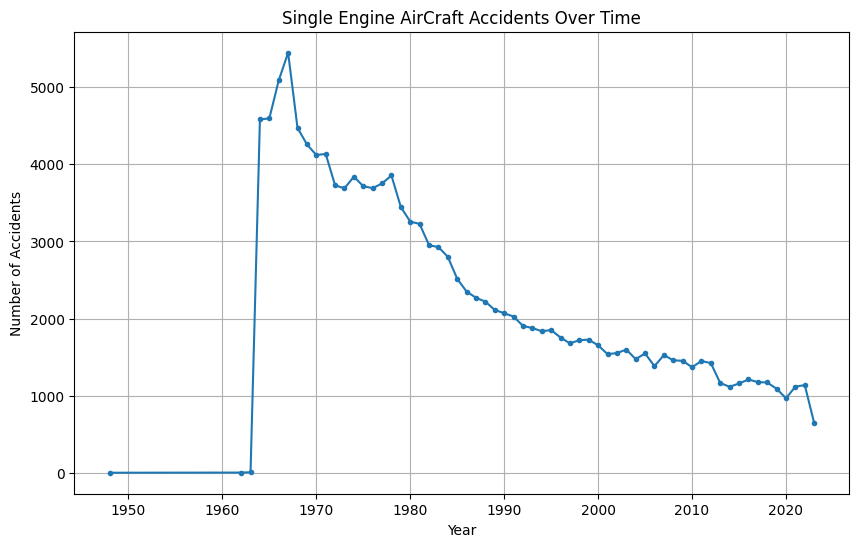

In [4]:
# Convert the EventDate column to datetime
data['EventDate'] = pd.to_datetime(data['EventDate'], errors='coerce')

# Group accidents by year and count the number of occurrences
accidents_by_year = data.groupby(data['EventDate'].dt.year)['EventDate'].count()


plt.figure(figsize=(10, 6))
plt.plot(accidents_by_year.index, accidents_by_year.values, marker='.')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Single Engine AirCraft Accidents Over Time')
plt.grid(True)
plt.show()


Finding the most common Make of Airplane involved in an accident

In [5]:
##Filling in 'Make' values that are custom built by a person or are otherwise a one of a kind, with 'Custom'
def drop_unique_makes_optimized(data):
  unique_makes = data['Make'].unique()
  value_counts = data['Make'].value_counts()

  for make, count in value_counts.items():
    if count < 10:
      data.loc[data['Make'] == make, 'Make'] = 'Custom'

  return data

mData = drop_unique_makes_optimized(data.copy())

# mData.head()

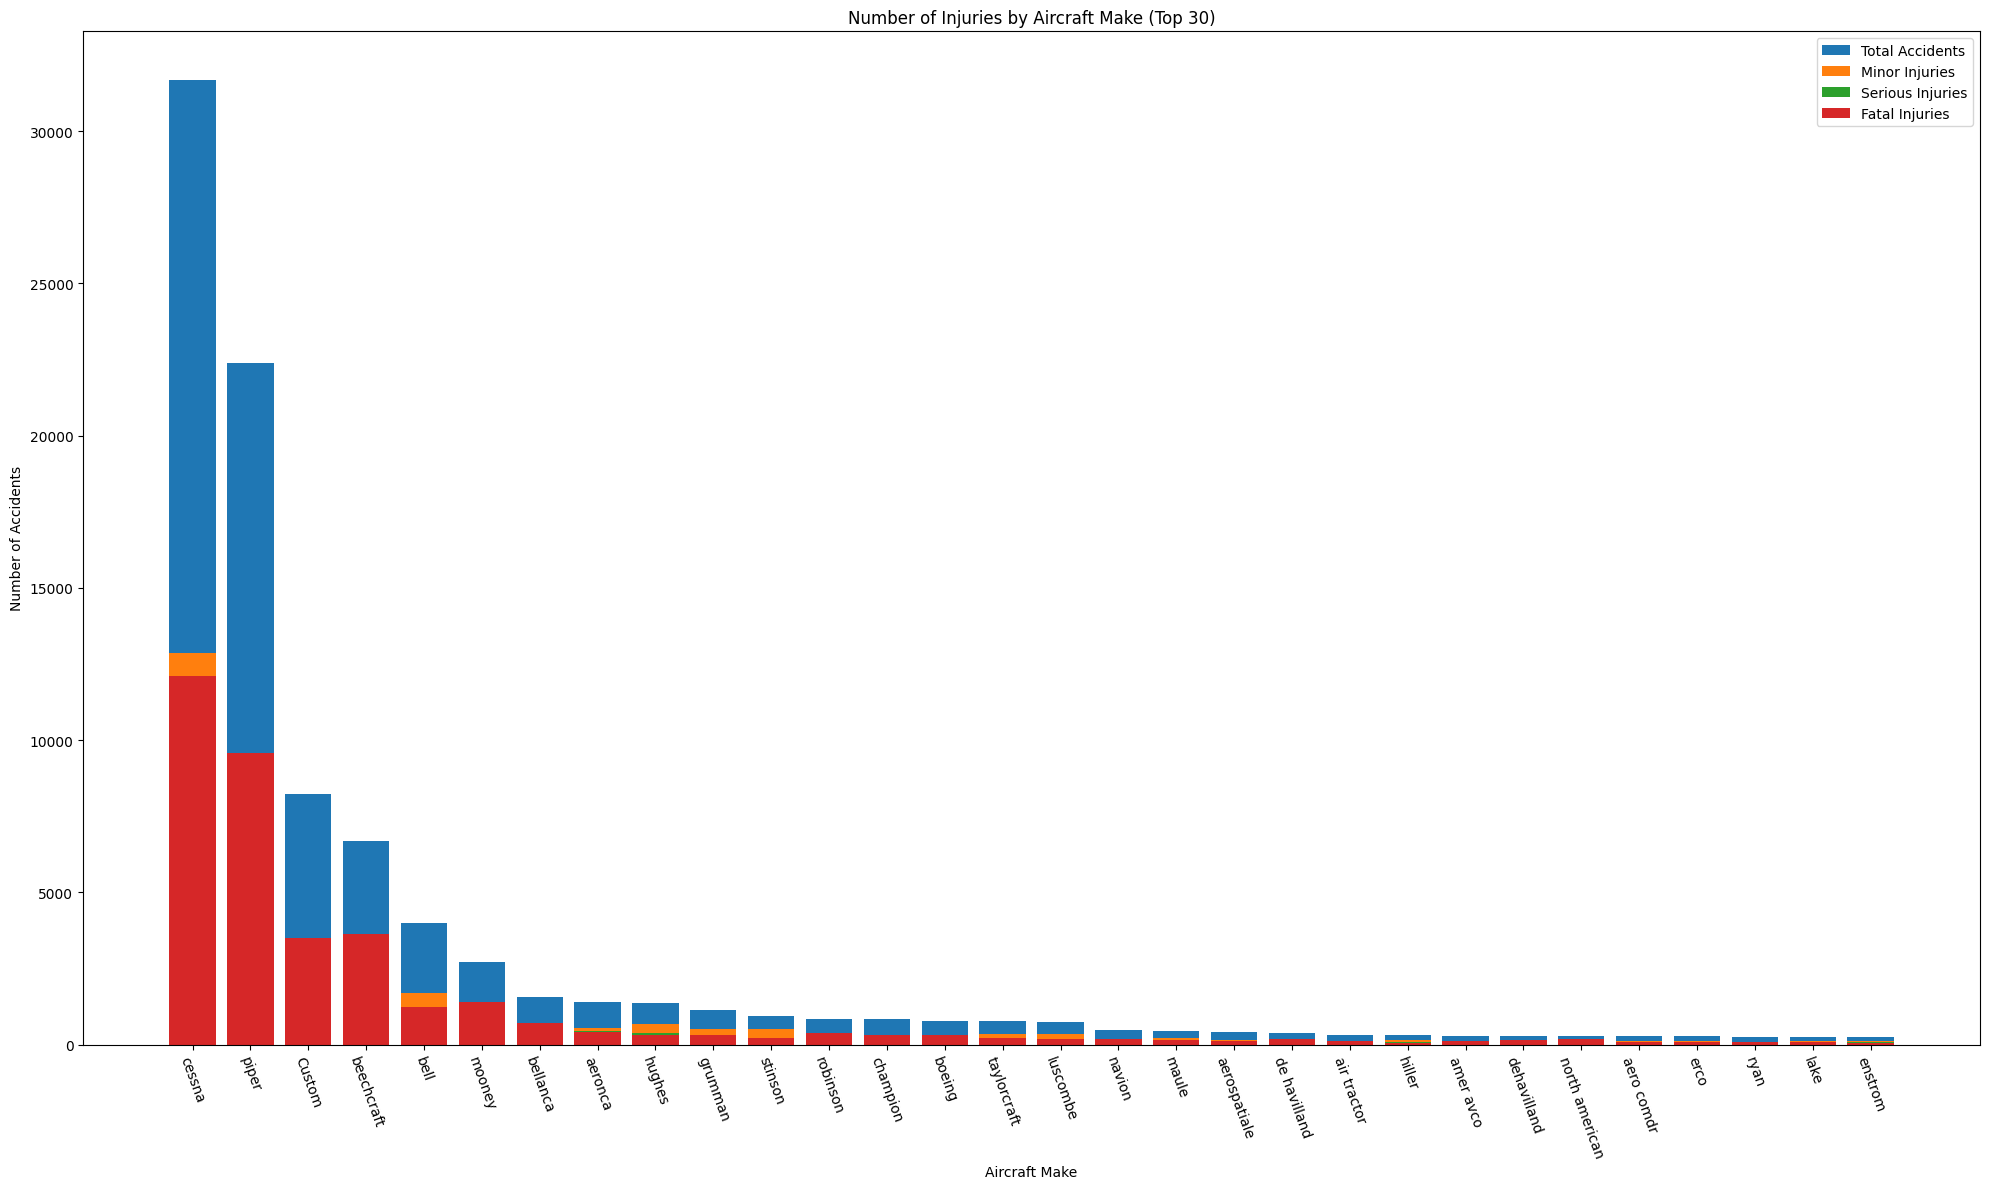

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the sum of fatal, serious, and minor injuries for each aircraft make
injury_counts = mData.groupby('Make')[['FatalInjuryCount', 'SeriousInjuryCount', 'MinorInjuryCount']].sum()
injury_counts['TotalInjuries'] = injury_counts.sum(axis=1)  # Calculate the total injuries

# Sort by total injuries and get the top 30 aircraft makes
top_30_aircraft_makes = injury_counts['TotalInjuries'].nlargest(30).index
filtered_data = injury_counts.loc[top_30_aircraft_makes]

# Create the chart
fig, ax = plt.subplots(figsize=(20, 12))
bars = plt.bar(filtered_data.index, filtered_data['TotalInjuries'], label='Total Accidents')
plt.bar(filtered_data.index, filtered_data['MinorInjuryCount'], label='Minor Injuries')
plt.bar(filtered_data.index, filtered_data['SeriousInjuryCount'], label='Serious Injuries')
plt.bar(filtered_data.index, filtered_data['FatalInjuryCount'], label='Fatal Injuries')



plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')
plt.title('Number of Injuries by Aircraft Make (Top 30)')
plt.xticks(rotation=-70)
plt.legend()

plt.tight_layout()
plt.show()


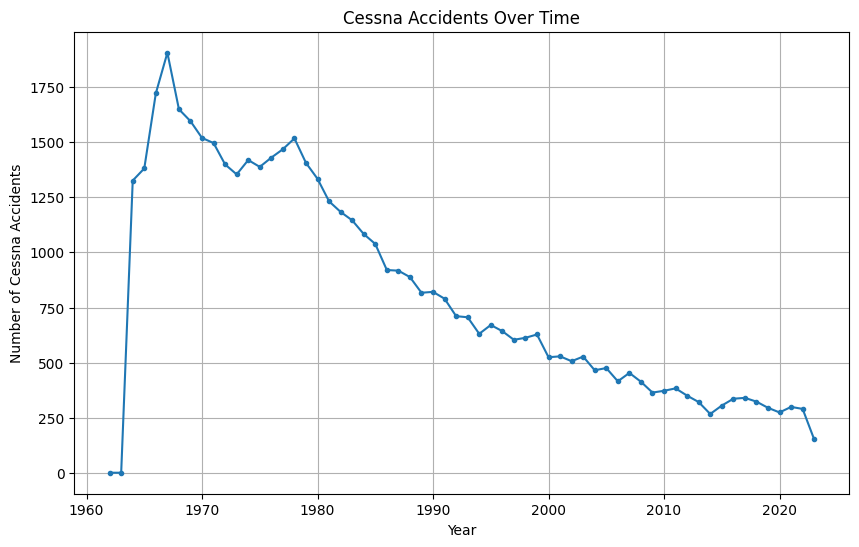

In [7]:
# Filter data for 'cessna' accidents
cessna_data = data[data['Make'] == 'cessna']

# Group cessna accidents by year and count the number of occurrences
cessna_accidents_by_year = cessna_data.groupby(cessna_data['EventDate'].dt.year)['EventDate'].count()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(cessna_accidents_by_year.index, cessna_accidents_by_year.values, marker='.')
plt.xlabel('Year')
plt.ylabel('Number of Cessna Accidents')
plt.title('Cessna Accidents Over Time')
plt.grid(True)
plt.show()


In [8]:
import pandas as pd
import nltk
from nltk.util import ngrams
from collections import Counter


# Function to perform textual analysis on n-grams in the ProbableCause column
def probable_cause_analysis(text, n=4, num_most_common=10):
    if pd.notnull(text):
        tokens = nltk.word_tokenize(text)
        # Remove stop words.
        stop_words = nltk.corpus.stopwords.words('english')
        tokens = [token for token in tokens if token.lower() not in stop_words]
        # Create n-grams
        n_gram_tokens = list(ngrams(tokens, n))
        # Count the frequency of n-grams.
        n_gram_counts = Counter(n_gram_tokens)
        # Find the most common n-grams.
        most_common_n_grams = n_gram_counts.most_common(num_most_common)
        return most_common_n_grams
    else:
        return None

# Perform n-gram analysis with bigrams (change 'n' for different n-grams)
#
data['ProbableCause'] = data['ProbableCause'].apply(probable_cause_analysis, n=4)

# Find the most common n-grams
most_common_probable_cause = data['ProbableCause'].value_counts().idxmax()

print(most_common_probable_cause)


[(('loss', 'engine', 'power', 'undetermined'), 1), (('engine', 'power', 'undetermined', 'reasons'), 1), (('power', 'undetermined', 'reasons', '.'), 1)]


In [9]:
%pip install gensim

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     -------------------------------------- 24.0/24.0 MB 801.3 kB/s eta 0:00:00
     -------------------------------------- 56.8/56.8 kB 270.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import pandas as pd
import nltk
from gensim.models import Word2Vec

# Assuming you have your data loaded in data

# Tokenize and preprocess text data
def preprocess(text):
    if isinstance(text, str):
        tokens = nltk.word_tokenize(text)
        tokens = [token.lower() for token in tokens if token.isalpha()]
        return tokens
    else:
        return []

data['ProbableCauseTokens'] = data['ProbableCause'].apply(preprocess)

# Build vocabulary
model = Word2Vec(vector_size=100, window=5, min_count=5, sg=0, epochs=30)
model.build_vocab(data['ProbableCauseTokens'])  # Build vocabulary

# Train Word2Vec model
model.train(data['ProbableCauseTokens'], total_examples=model.corpus_count, epochs=model.epochs, compute_loss=True)  # Add compute_loss=True to track loss during training

# Get word vectors
word_vectors = model.wv

# Calculate semantic similarity
similarity = word_vectors.similarity('engine', 'failure')

print(f"Semantic similarity between 'engine' and 'failure': {similarity}")


RuntimeError: you must first build vocabulary before training the model